    Color  Size  Act  Age  Class
0       1     1    1    0      1
1       1     1    1    1      1
2       1     1    0    0      1
3       1     1    0    1      1
4       1     1    1    0      1
5       1     1    1    1      1
6       1     1    0    0      1
7       1     1    0    1      1
8       1     0    1    0      0
9       1     0    1    1      0
10      1     0    0    0      0
11      1     0    0    1      0
12      0     1    1    0      0
13      0     1    1    1      0
14      0     1    0    0      0
15      0     1    0    1      0
16      0     0    1    0      0
17      0     0    1    1      0
18      0     0    0    0      0
19      0     0    0    1      0
One hot codificado: 
    Color_0  Color_1  Size_0  Size_1  Act_0  Act_1  Age_0  Age_1 Class
0     False     True   False    True  False   True   True  False     1
1     False     True   False    True  False   True  False   True     1
2     False     True   False    True   True  False   True  False     1
3 

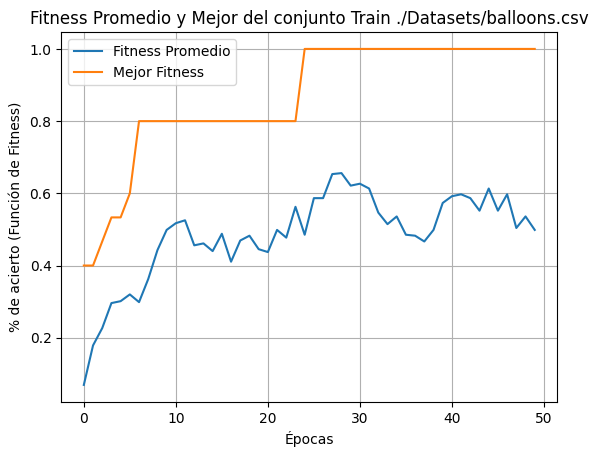

      Pclass  Sex  Age  Class
0          2    1    3      1
1          2    1    6      1
2          3    0    4      0
3          3    0    0      0
4          1    1    9      1
...      ...  ...  ...    ...
1041       3    1    3      0
1042       3    1    8      0
1043       3    0    4      1
1044       3    1    4      0
1045       2    1    3      0

[1046 rows x 4 columns]
One hot codificado: 
      Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_0  Age_1  Age_2  Age_3  \
0        False      True     False  False   True  False  False  False   True   
1        False      True     False  False   True  False  False  False  False   
2        False     False      True   True  False  False  False  False  False   
3        False     False      True   True  False   True  False  False  False   
4         True     False     False  False   True  False  False  False  False   
...        ...       ...       ...    ...    ...    ...    ...    ...    ...   
1041     False     False      True

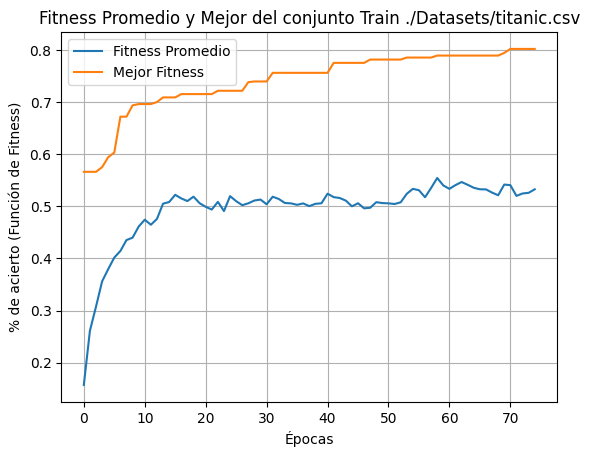

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from Datos import Datos
from Datos import codificacion_one_hot
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from Clasificador import Clasificador
from ClasificadorAlgoritmoGenetico import ClasificadorAlgoritmoGenetico

datasets = ['./Datasets/balloons.csv', './Datasets/titanic.csv']

for dataset_name in datasets:

    if dataset_name == './Datasets/balloons.csv':
        poblacion = 25
        epochs = 50
        max_reglas = 3
    else:
        poblacion = 100
        epochs = 75
        max_reglas = 5
        
    datos = Datos(dataset_name)
    
    cols = datos.datos.columns 
    atributos_unicos = []
    print(datos.datos)
    
    for col in cols:
        if col == 'Class':
            break
        atributos_unicos.append(len(np.unique(datos.datos[col])))
    
    datos.datos = codificacion_one_hot(datos.datos)
    print(f"One hot codificado: \n{datos.datos}")
    nom_atributos = datos.nominalAtributos
    dic = datos.diccionarios
    
    seed = 42
    
    simple = ValidacionSimple(1)
    indices = simple.creaParticiones(datos.datos, seed=seed)
    
    indices_train = indices[0].indicesTrain
    indices_test = indices[0].indicesTest
    
    datosTrain = datos.extraeDatos(indices_train)
    datosTest = datos.extraeDatos(indices_test)

    clf = ClasificadorAlgoritmoGenetico(poblacion_size=poblacion, max_reglas=max_reglas, epochs=epochs, pmut=0.02, elitismo=0.02, atributos_unicos=atributos_unicos, seed=seed)
    fitness_medio_list, mejor_fitness_list = clf.entrenamiento(datosTrain, nom_atributos, dic)
    fitness_test = clf.clasifica(datosTest, nom_atributos, dic)
    
    plt.plot(range(epochs), fitness_medio_list, label="Fitness Promedio")
    plt.plot(range(epochs), mejor_fitness_list, label="Mejor Fitness")
    plt.title(f"Fitness Promedio y Mejor del conjunto Train {dataset_name}")
    plt.xlabel("Épocas")
    plt.ylabel("% de acierto (Función de Fitness)")
    plt.grid()
    plt.legend()
    plt.show()


# Apartado 1

Breve descripción de algunos detalles de la implementación.
Solo es necesario especificar los siguientes aspectos:
a) Mecanismo/s de cruce implementado
b) Mecanismo/s de mutación implementado

Se ha implementado un mecanismo de cruce intra-reglas, donde se elige aleatoriamente una regla de cada progenitor y un punto de cruce. El punto de cruce determina que parte de las reglas que se intercambiarán entre los progenitores, en concreto, todo lo que quede a la derecha del punto de cruce será intercambiado entre los progenitores, y para mantener la semántica se establece la misma posición del punto de cruce para ambas reglas.

Para el mecanismo de mutación se ha implimentado una mutación estándar aplicada a todas las reglas, es decir para todas las reglas de individuo se reccoren bit a bit aplicando una mutación (cambiando el valor del bit) según una probabilidad dada.

# Apartado 2

Resultados de la clasificación para cada uno de los dos conjuntos
de prueba. Indicar con qué combinación de
individuos/generaciones se consigue el mejor resultado.
Además del porcentaje de acierto o error, deberá incluirse en
el notebook el conjunto de reglas correspondiente al mejor
individuo, así como una interpretación del significado de
dichas reglas.

# Apartado 3

Análisis de resultados: importancia del número de reglas, tamaño
de la población, generaciones

# Apartado 4

Solo para la fase de entrenamiento, evolución en forma de gráfica:
a) Del fitness del mejor individuo de la población
b) Del fitness medio de la población